Importing Significant Libraries

In [1]:
import nltk
import re
import seaborn as sns
import pandas as pandas
import string
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud as word_cloud
from wordcloud import STOPWORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer as Tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

Data Reading

In [2]:
hatespeech_dataset = pandas.read_csv("C://Users//Dell//Desktop//hatespeech//labeled_data.csv")
hatespeech_dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
hatespeech_dataset.shape

(24783, 7)

In [4]:
hatespeech_dataset['class'].unique()

array([2, 1, 0], dtype=int64)

Checking Null Values

In [5]:
hatespeech_dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

Droping unnecesary columns

In [6]:
unnecessary_columns = ['Unnamed: 0','count','hate_speech','offensive_language','neither']
boolean_value = True
hatespeech_dataset.drop(unnecessary_columns,axis=1,inplace=boolean_value)

Checking the data wheather it is in balanced format or not

<AxesSubplot:xlabel='class', ylabel='count'>

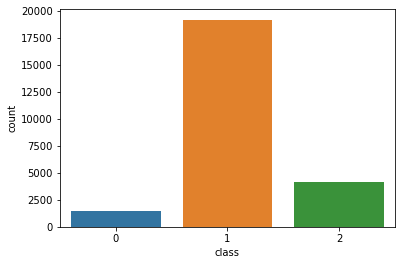

In [7]:
sns.countplot('class',data = hatespeech_dataset)

Applying the oversampling to data

In [8]:
data_class_1 = hatespeech_dataset[hatespeech_dataset['class'] == 1]
data_class_2 = hatespeech_dataset[hatespeech_dataset['class'] == 2]
data_class_0 = hatespeech_dataset[hatespeech_dataset['class'] == 0]

In [9]:
data_class_1.shape , data_class_2.shape , data_class_0.shape

((19190, 2), (4163, 2), (1430, 2))

In [10]:
data_class_1.shape[0]

19190

In [11]:
data_class_2_over = data_class_2.sample(data_class_1.shape[0],replace=boolean_value)
data_class_0_over = data_class_0.sample(data_class_1.shape[0],replace=boolean_value)

In [12]:
balanced_data = pandas.concat([data_class_2_over,data_class_0_over,data_class_1],axis=0)
balanced_data['class'].value_counts()

0    19190
1    19190
2    19190
Name: class, dtype: int64

Again checking the data whether it is in balanced format or not after applying the oversampling technique

<AxesSubplot:xlabel='class', ylabel='count'>

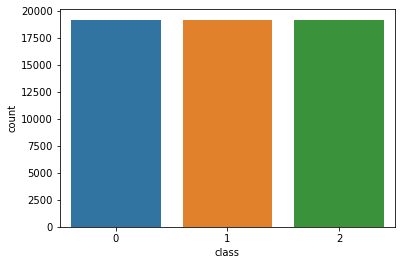

In [13]:
sns.countplot('class',data = balanced_data)

Checking the tweet column data how it looks like

In [14]:
balanced_data['tweet'][0]


0    !!! RT @mayasolovely: As a woman you shouldn't...
0    !!! RT @mayasolovely: As a woman you shouldn't...
0    !!! RT @mayasolovely: As a woman you shouldn't...
0    !!! RT @mayasolovely: As a woman you shouldn't...
0    !!! RT @mayasolovely: As a woman you shouldn't...
Name: tweet, dtype: object

In [15]:
balanced_data['tweet'][5]

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

Cleaning the data using regular expressions

In [23]:
stemmer = nltk.SnowballStemmer(language = "english")
stopword = set(stopwords.words('english'))

def tweet_clean(data):
    data = str(data).lower()
    data = re.sub('\[.*?\]', '', data)
    data = re.sub('https?://\S+|www\.\S+', '', data)
    data = re.sub('<.*?>+', '', data)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', data)
    data = re.sub('\w*\d\w*', '', data)
    data = re.sub('\n', '', data)
    data = [word for word in data.split(' ') if word not in stopword]
    data=" ".join(data)
    data = [stemmer.stem(word) for word in data.split(' ')]
    data =" ".join(data)
    
    return data

In [24]:
balanced_data['tweet'] = balanced_data['tweet'].apply(tweet_clean)

Displaying the text using the world cloud

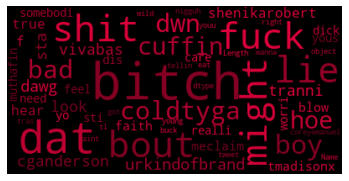

In [25]:
stopwords = set(stop_words)
stopwords.add("RT")

value = None

def color_function(word=value, font_size=value, position=value,  orientation=value, font_path=value, random_state=value):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = word_cloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1100,
                          max_font_size=60, 
                          random_state=10
                         ).generate(str(balanced_data.loc[balanced_data["class"]==1].tweet))
print(wordcloud)
fig = plt.figure(20)
plt.imshow(wordcloud.recolor(color_func= color_function, random_state=1),
           interpolation="bilinear")
plt.axis('off')
plt.show()

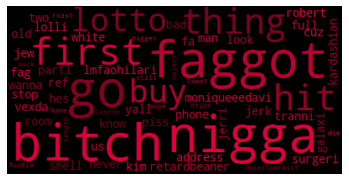

In [26]:
def color_function(word=value, font_size=value, position=value,  orientation=value, font_path=value, random_state=value):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = word_cloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1100,
                          max_font_size=60, 
                          random_state=10
                         ).generate(str(balanced_data.loc[balanced_data["class"]==0].tweet))
print(wordcloud)
fig = plt.figure(20)
plt.imshow(wordcloud.recolor(color_func= color_function, random_state=1),
           interpolation="bilinear")
plt.axis('off')
plt.show()

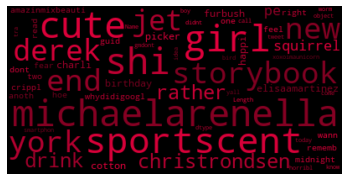

In [27]:
def color_function(word=value, font_size=value, position=value,  orientation=value, font_path=value, random_state=value):
    h = 344
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = word_cloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1100,
                          max_font_size=60, 
                          random_state=10
                         ).generate(str(balanced_data.loc[balanced_data["class"]==2].tweet))
print(wordcloud)
fig = plt.figure(20)
plt.imshow(wordcloud.recolor(color_func= color_function, random_state=1),
           interpolation="bilinear")
plt.axis('off')
plt.show()

Assigning the data to input varible and target variable

In [28]:
x = balanced_data['tweet']
y = balanced_data['class']

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer as Tf
from sklearn.model_selection import train_test_split
obj = Tf(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfvect = obj.fit_transform(x)
tfvect

<57570x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 544295 stored elements in Compressed Sparse Row format>

In [30]:
tfvect.shape

(57570, 10000)

In [31]:
tfvect.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
X = tfvect
y = balanced_data['class']
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

In [33]:
X_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
X_test_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Logistic Regression

In [35]:
logistic = LogisticRegression(max_iter=1000).fit(X_train_tf,y_train)
log_pred = logistic.predict(X_test_tf)
report = classification_report( y_test, log_pred )
print(report)
log_acc = accuracy(y_test,log_pred)
print("Logistic Regression, Accuracy Score:" , log_acc)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3859
           1       0.97      0.88      0.92      3851
           2       0.94      0.98      0.96      3804

    accuracy                           0.94     11514
   macro avg       0.95      0.94      0.94     11514
weighted avg       0.95      0.94      0.94     11514

Logistic Regression, Accuracy Score: 0.9441549418099705


# Decision Trees

In [36]:
deci_tree = DecisionTreeClassifier().fit(X_train_tf,y_train)
dec_pred = deci_tree.predict(X_test_tf)
report = classification_report( y_test, dec_pred)
print(report)
dec_acc=accuracy(y_test,dec_pred)
print("Decision Trees, Accuracy Score:" , dec_acc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3859
           1       1.00      0.91      0.95      3851
           2       0.96      1.00      0.98      3804

    accuracy                           0.97     11514
   macro avg       0.97      0.97      0.97     11514
weighted avg       0.97      0.97      0.97     11514

Decision Trees, Accuracy Score: 0.9673441028313358


# Random Forest

In [37]:
random_forest = RandomForestClassifier().fit(X_train_tf,y_train)
rand_pred = random_forest.predict(X_test_tf)
report = classification_report( y_test, rand_pred)
print(report)
rand_acc=accuracy(y_test,rand_pred)
print("Random Forest, Accuracy Score:" , rand_acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       1.00      0.94      0.97      3851
           2       0.96      1.00      0.98      3804

    accuracy                           0.98     11514
   macro avg       0.98      0.98      0.98     11514
weighted avg       0.98      0.98      0.98     11514

Random Forest, Accuracy Score: 0.9782873024144519


# Support Vector Machines

In [38]:
svc = SVC(kernel='rbf').fit(X_train_tf,y_train)
svc_pred = svc.predict(X_test_tf)
report = classification_report( y_test, svc_pred )
print(report)
acc=accuracy(y_test,svc_pred)
print("Support Vector Machine, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3859
           1       0.99      0.94      0.97      3851
           2       0.96      0.99      0.98      3804

    accuracy                           0.98     11514
   macro avg       0.98      0.98      0.98     11514
weighted avg       0.98      0.98      0.98     11514

Support Vector Machine, Accuracy Score: 0.9779398992530832


# Knearest neighbour classifier

In [39]:
knn = KNeighborsClassifier().fit(X_train_tf,y_train)
knn_pred = knn.predict(X_test_tf)
report = classification_report( y_test, knn_pred)
print(report)
knn_acc=accuracy(y_test,knn_pred)
print("k nearest neighbour classifier, Accuracy Score:" , knn_acc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3859
           1       0.96      0.42      0.58      3851
           2       0.71      0.97      0.82      3804

    accuracy                           0.79     11514
   macro avg       0.83      0.79      0.77     11514
weighted avg       0.83      0.79      0.77     11514

k nearest neighbour classifier, Accuracy Score: 0.7942504776793469


# Ada Boost Classifier

In [40]:
ada_boost = AdaBoostClassifier().fit(X_train_tf,y_train)
boost_pred = ada_boost.predict(X_test_tf)
report = classification_report( y_test, boost_pred)
print(report)
ada_acc=accuracy(y_test,boost_pred)
print("Ada Boost classifier, Accuracy Score:" , ada_acc)

              precision    recall  f1-score   support

           0       0.84      0.69      0.76      3859
           1       0.82      0.83      0.83      3851
           2       0.81      0.95      0.88      3804

    accuracy                           0.82     11514
   macro avg       0.82      0.82      0.82     11514
weighted avg       0.82      0.82      0.82     11514

Ada Boost classifier, Accuracy Score: 0.822303282959875


# Gradient Boosting classifier

In [41]:
grad = GradientBoostingClassifier().fit(X_train_tf,y_train)
grad_pred = grad.predict(X_test_tf)
report = classification_report( y_test, grad_pred)
print(report)
grad_acc = accuracy(y_test,grad_pred)
print("Gradient Boosting classifier, Accuracy Score:" , grad_acc)

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      3859
           1       0.86      0.83      0.85      3851
           2       0.83      0.97      0.90      3804

    accuracy                           0.85     11514
   macro avg       0.86      0.85      0.85     11514
weighted avg       0.86      0.85      0.85     11514

Gradient Boosting classifier, Accuracy Score: 0.8536564182734063
